In [7]:
%matplotlib notebook
import numpy as np
import math
import numdifftools as nd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [8]:
def func(x):
    return x[0]**2 + 2*x[1]**2 + (math.e)**(x[0] + x[1])

In [9]:
class GD:
    
    def __init__(self, func, n = 2, h = 0.4, eps = 0.0001, initP = (1, 1)):
        
        self.n = n          # Размерность
        self.h = h          # Величина шага
        self.eps = eps      # Точность поиска
        self.func = func    # Оптимизируемая функция
        self.counter = 0    # Счетчик итераций
        
        self.point = initP  # Текущая точка
        
        self.pointHist = [list(self.point).copy()] # Найденные точки
        self.funcHist = [self.func(self.point)]    # Функция в найденных точках
        
        
    def execute(self):
        
        while True:
            
            # Вычисление градиента
            grad = nd.Gradient(self.func)(self.point)
            
            # Проверка условия окончания поиска
            if np.linalg.norm(grad) <= eps:
                
                break
                
            else:
                
                # Определение координат новой точки
                newP = self.point - self.h*grad
                while self.func(newP) >= self.func(self.point):
                    self.h /= 2
                    newP = self.point - self.h*grad
                self.point = newP
                
                # Сохранение найденных значений и увелечение счетчика
                self.pointHist.append(list(self.point).copy())
                self.funcHist.append(self.func(self.point))
                self.counter += 1
                

In [16]:
fun = func
n = 2
h = 0.2
eps = 0.0001
initP = (-4, 4)

gd = GD(fun, n, h, eps, initP)
gd.execute()

In [17]:
hP = gd.pointHist
hF = gd.funcHist
fhP = [hP[0:i+1] for i in range(len(hP))]

print(f'\n\nНайденная точка минимума: {tuple(hP[-1])}\n')
print(f'Найденный минимум: {hF[-1]}\n')
print(f'Количество итераций: {gd.counter}\n\n')
print(f'Таблица найденных точек:\n')
print('{0:>10}  {1:>10}  {2:>15}\n'.format('x1', 'x2', 'func(x1, x2)'))
for i, p in enumerate(hP):
    print('{0:10.5f}  {1:10.5f}  {2:15.5f}'.format(p[0], p[1], hF[i]))



Найденная точка минимума: (-0.31279666317515387, -0.1563748349300612)

Найденный минимум: 0.7722682289033758

Количество итераций: 18


Таблица найденных точек:

        x1          x2     func(x1, x2)

  -4.00000     4.00000         49.00000
  -2.60000     0.60000          7.61534
  -1.58707     0.09293          2.76050
  -0.99713    -0.02630          1.35501
  -0.67015    -0.07713          0.93465
  -0.49682    -0.11016          0.81610
  -0.40709    -0.13103          0.78391
  -0.36102    -0.14297          0.77533
  -0.33744    -0.14942          0.77307
  -0.32537    -0.15279          0.77248
  -0.31921    -0.15454          0.77232
  -0.31606    -0.15544          0.77228
  -0.31445    -0.15590          0.77227
  -0.31363    -0.15614          0.77227
  -0.31321    -0.15626          0.77227
  -0.31299    -0.15632          0.77227
  -0.31288    -0.15635          0.77227
  -0.31283    -0.15637          0.77227
  -0.31280    -0.15637          0.77227


<IPython.core.display.Javascript object>


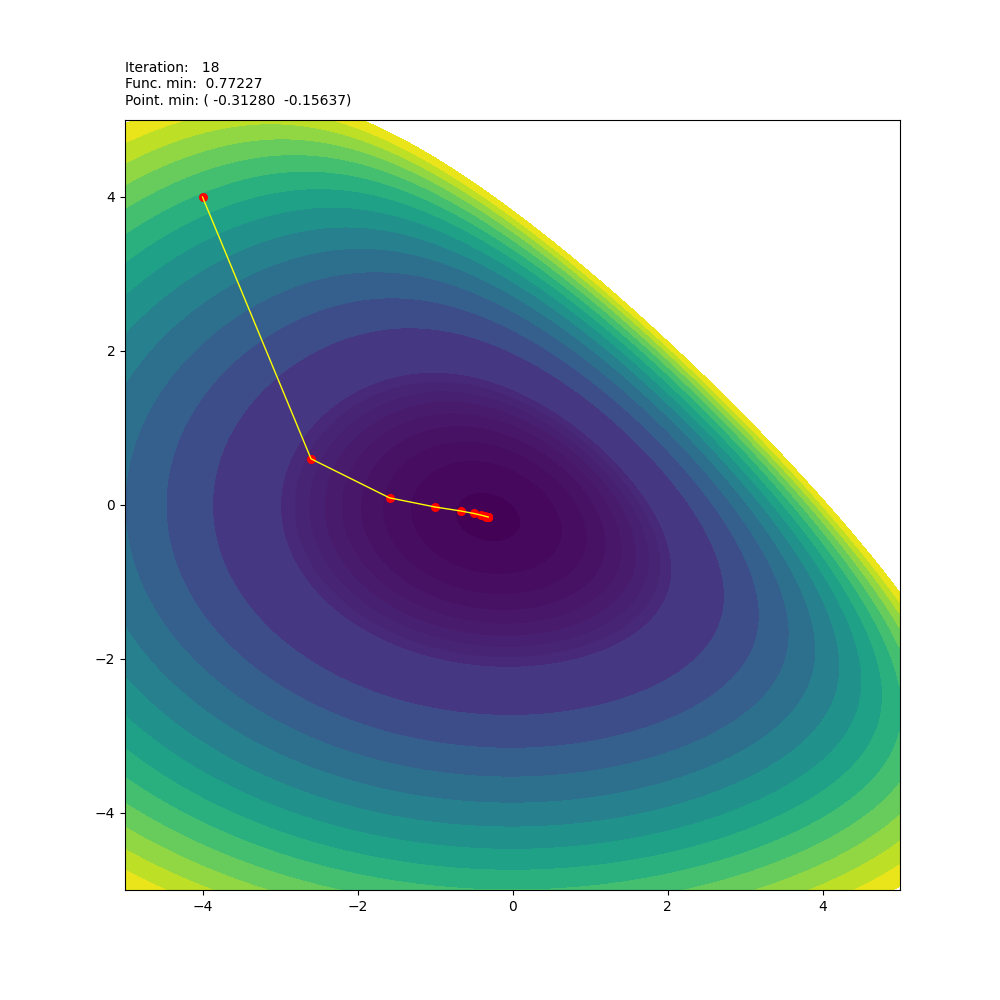

In [18]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = func((X, Y))

figA = plt.figure(figsize=(10, 10))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, np.concatenate((np.arange(0, 10, 1), np.arange(15, 80, 5))))


scat = axA.scatter([], [], s=30, c='red')
line, = axA.plot([], color='yellow', linewidth=1)
temp = axA.text(-5, 5.2, '')
    
def animate(i):
    temp.set_text('Iteration: {0:4d}\nFunc. min: {1:8.5f}\nPoint. min: ({2:9.5f} {3:9.5f})'.format(i, hF[i], hP[i][0], hP[i][1]))
    scat.set_offsets(fhP[i])
    t = np.array(fhP[i])
    x, y = t[:,0], t[:,-1]
    line.set_data((x, y))
    
anim1 = FuncAnimation(figA, animate, frames=len(hP), interval=1000, repeat=False)